# Explore Solar PV Data

The main data source used for this project is Berkeley Lab's [Tracking the Sun](https://emp.lbl.gov/tracking-the-sun) report. According to their homepage, the most recent update contains data on more than 1.8 million distributed PV installations through 2019, covering about 82% of all distributed PV in the United States. This notebook contains an initial exploration of the most recent report. 

### Plan
- Preliminary EDA - what data is available, how is it structured, etc
- EDA - brief exploration of residential PV trends in the US
- Next Steps - formatting the data for main analysis

Please refer to `tsr-user-guide.pdf` in references/ for explanations of column names

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Preliminary EDA

This dataset is saved as two separate csv files in /data/solar

In [2]:
files = os.listdir('../../data/solar/')
files

['solar-installations1.csv', 'solar-installations2.csv']

In [3]:
df = pd.concat([pd.read_csv('../../data/solar/{}'.format(f)) for f in files])
print('Shape: ', df.shape)
df.head()

/Users/mattcarr/opt/anaconda3/envs/solar-analysis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (1,3,14,30,31,33,34,38,55,56,58,59) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/mattcarr/opt/anaconda3/envs/solar-analysis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (1,2,3,14,15,17,19,27,28,30,31,33,34,37,38,39,52,53,55,56,58,59) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Shape:  (1844487, 78)


,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,...,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,Arkansas State Energy Office,-9999,-9999,-9999,29-Apr-2010 00:00:00,2.016,14558.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.178947,-9999.0,-9999.0
1,Arkansas State Energy Office,-9999,-9999,-9999,26-Apr-2010 00:00:00,3.360,26096.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.178947,-9999.0,-9999.0
2,Arkansas State Energy Office,-9999,-9999,-9999,20-Apr-2010 00:00:00,13.440,91139.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.178947,-9999.0,-9999.0
3,Arkansas State Energy Office,-9999,-9999,-9999,21-Apr-2010 00:00:00,5.520,40043.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.210526,-9999.0,-9999.0
4,Arkansas State Energy Office,-9999,-9999,-9999,22-Apr-2010 00:00:00,2.530,21497.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.210526,-9999.0,-9999.0


In [4]:
df.columns

Index(['data_provider_1', 'data_provider_2', 'system_ID_1', 'system_ID_2',
       'installation_date', 'system_size_DC', 'total_installed_price',
       'rebate_or_grant', 'customer_segment', 'expansion_system',
       'multiple_phase_system', 'new_construction', 'tracking',
       'ground_mounted', 'zip_code', 'city', 'state',
       'utility_service_territory', 'third_party_owned', 'installer_name',
       'self_installed', 'azimuth_1', 'azimuth_2', 'azimuth_3', 'tilt_1',
       'tilt_2', 'tilt_3', 'module_manufacturer_1', 'module_model_1',
       'module_quantity_1', 'module_manufacturer_2', 'module_model_2',
       'module_quantity_2', 'module_manufacturer_3', 'module_model_3',
       'module_quantity_3', 'additional_modules', 'technology_module_1',
       'technology_module_2', 'technology_module_3', 'BIPV_module_1',
       'BIPV_module_2', 'BIPV_module_3', 'bifacial_module_1',
       'bifacial_module_2', 'bifacial_module_3', 'nameplate_capacity_module_1',
       'nameplate_capaci

The data offers a lot of specific info on each PV installation. This could be useful for further analysis, but there are only a few specific columns I want to focus on right now.
- Data Providers - Who submitted the data
- System Id - unique id of PV system
- installation_data - when PV system was installed
- system_size_DC - DC output (capacity) of PV system
- total_installed_price - total cost of system prior to any incentives
- rebate_or_grant - pre-tax value of any rebate or grant provided
- customer_segment - PV system sector (residential, C&I, government, etc)
- zip_code, city, state, and utility_service_territory - location and utility where PV system is located
- installer_name - Installer of PV system

In [9]:
COLS = ['data_provider_1', 'data_provider_2', 'system_ID_1', 'system_ID_2', 'installation_date', 'system_size_DC', 'total_installed_price', 'rebate_or_grant',
        'customer_segment', 'zip_code', 'city', 'state', 'utility_service_territory', 'installer_name']

In [10]:
solar = df[COLS]

In [6]:
# Check for duplicates
solar.duplicated().sum()

1542

1,542 duplicate entries. I can drop these

In [7]:
solar = solar.drop_duplicates()

In [8]:
solar.isna().sum()

data_provider_1              0
data_provider_2              0
system_ID_1                  0
system_ID_2                  0
installation_date            0
system_size_DC               0
total_installed_price        0
rebate_or_grant              0
customer_segment             0
zip_code                     0
city                         0
state                        0
utility_service_territory    0
installer_name               0
dtype: int64

According to data documentation, missing values are indicated by the integer -9999

In [11]:
for col in COLS:
    print(col, len(solar[solar[col] == -9999]))

data_provider_1 0
data_provider_2 705799
system_ID_1 66431
system_ID_2 713954
installation_date 0
system_size_DC 13661
total_installed_price 422645
rebate_or_grant 151785
customer_segment 0
zip_code 67544
city 99015
state 0
utility_service_territory 24576
installer_name 24576


`system_size_DC` is missing about 14,000 and `zip_code` is missing about 68,000. Those are the two most important columns to me right now. Since I won't be looking at all of these PV systems, anyways, I want to perform some initial filtering and see how many values I am missing then.

In [12]:
solar['customer_segment'].value_counts()

RES           1756181
COM             36202
-9999           21741
NON-RES         18033
GOV              5097
NON-PROFIT       3828
SCHOOL           3405
Name: customer_segment, dtype: int64

1,756,181 (about 95%) of the systems are residential. This is good since I am focusing on residential PV. Below I filter the dataframe to only include residential systems (`RES`)

In [13]:
solar = solar[solar['customer_segment'] == 'RES']

Convert date column to pandas datetime

In [14]:
solar['installation_date'] = pd.to_datetime(solar['installation_date'])

In [15]:
print('Oldest installation date: ', solar['installation_date'].min())
print('Most recent installation date: ', solar['installation_date'].max())

Oldest installation date:  1998-01-30 00:00:00
Most recent installation date:  2019-12-31 00:00:00


The oldest installation is from January of 1998 and the most recent is from December of 2019. According to another analysis conducted on this dataset, PV systems installed prior to 2010 represent an extremely small and noisy sample, predominantly occupied by California. Below, I create a column `year_installed` and check how many PV systems were installed each year

In [16]:
solar['year_installed'] = solar['installation_date'].apply(lambda d: d.year)

Since missing values are -9999 (as opposed to np.nan) they will be included in groupby calculations. This means even systems missing `system_size_DC` will be accounted for by .count()

In [18]:
installations_per_year = solar.groupby('year_installed').count()['system_size_DC']
installations_per_year

year_installed
1998        35
1999       175
2000       173
2001      1147
2002      2212
2003      2844
2004      4996
2005      5170
2006      8274
2007     12698
2008     15462
2009     27726
2010     38803
2011     51050
2012     69519
2013    108062
2014    159540
2015    251305
2016    286986
2017    226562
2018    233683
2019    249759
Name: system_size_DC, dtype: int64

Text(0.5, 1.0, 'Number of Residential PV Installations Per Year')

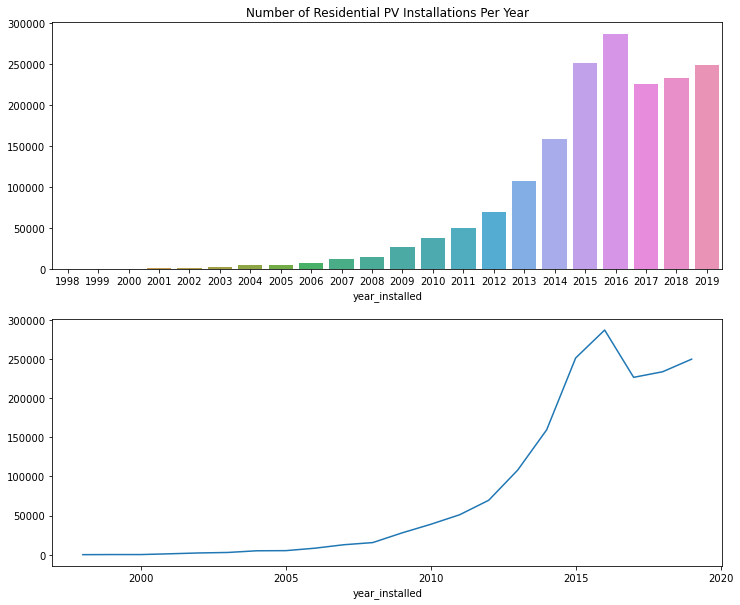

In [20]:
fig, ax = plt.subplots(nrows=2, figsize=(12,10))
sns.barplot(x=installations_per_year.index, y=installations_per_year.values, ax=ax[0])
sns.lineplot(x=installations_per_year.index, y=installations_per_year.values, ax=ax[1])

ax[0].set_title('Number of Residential PV Installations Per Year')

We can see a substantial upward trend beginning in 2010-2011 along with a pretty large decline in total installations from 2016 to 2017

I want to see how many systems were installed prior to 2010, and which states they were in

In [21]:
print('Number installed before 2010: ', installations_per_year[installations_per_year.index < 2010].sum())
print('Number installed 2010 and after: ', installations_per_year[installations_per_year.index >= 2010].sum())

Number installed before 2010:  80912
Number installed 2010 and after:  1675269


In [23]:
solar[solar['year_installed'] < 2010]['state'].value_counts(normalize=True)

CA    0.675339
AZ    0.056926
CO    0.053762
NY    0.050957
NJ    0.048744
MA    0.019317
MD    0.013793
CT    0.012804
FL    0.011630
TX    0.011494
VT    0.008627
WI    0.006439
PA    0.006093
OR    0.006044
NM    0.005216
DE    0.004993
VA    0.002929
MN    0.002447
DC    0.000927
OH    0.000890
MO    0.000408
NH    0.000148
KS    0.000049
AR    0.000012
UT    0.000012
Name: state, dtype: float64

67% of residential PV systems installed before 2010 were in California.

In [24]:
solar[solar['year_installed'] >= 2010]['state'].value_counts(normalize=True)

CA    0.588231
AZ    0.090967
NJ    0.065967
MA    0.053458
NY    0.053268
CO    0.028543
CT    0.022671
UT    0.015913
TX    0.015560
NM    0.011878
MD    0.008652
VT    0.008058
VA    0.006065
MO    0.003698
WA    0.003552
PA    0.003506
IL    0.003437
NH    0.003349
DC    0.002435
WI    0.002329
DE    0.001961
FL    0.001787
OR    0.001662
OH    0.000768
RI    0.000766
MN    0.000754
KS    0.000711
AR    0.000054
Name: state, dtype: float64

California still accounts for over 58% of installations in 2010 and after, but this is a much larger sample size. I am only going to focus on PV systems installed in 2010 or after. I may look at an even smaller time period in the future (2015 was a major jump in total systems installed) but for now I will look at 2010-2019

In [25]:
solar = solar[solar['year_installed'] >= 2010]
solar.shape

(1675269, 15)

In [26]:
for col in COLS:
    print(col, len(solar[solar[col] == -9999]))

data_provider_1 0
data_provider_2 628632
system_ID_1 61917
system_ID_2 637097
installation_date 0
system_size_DC 10913
total_installed_price 380017
rebate_or_grant 115731
customer_segment 0
zip_code 58788
city 87997
state 0
utility_service_territory 23951
installer_name 23612


Still missing a number of `system_size_DC` and `zip_code`.

In [27]:
# Dataframe of all systems missing capacity value
missing_capacity = solar[solar['system_size_DC'] == -9999]

I want to look at `year_installed` and `state` to see if there is any bias for which systems are missing capacity

In [29]:
missing_capacity.groupby('year_installed').count()['system_size_DC'] / installations_per_year[installations_per_year.index >= 2010]

year_installed
2010    0.010850
2011    0.013340
2012    0.016183
2013    0.057245
2014    0.005729
2015    0.002344
2016    0.000756
2017    0.000406
2018    0.000462
2019    0.002322
Name: system_size_DC, dtype: float64

In [30]:
installations_per_year[installations_per_year.index >= 2010]

year_installed
2010     38803
2011     51050
2012     69519
2013    108062
2014    159540
2015    251305
2016    286986
2017    226562
2018    233683
2019    249759
Name: system_size_DC, dtype: int64

2013 is missing the most at 5%. 2010-2012 are all missing about 1%, all years after 2013 are under 1%

In [33]:
missing_capacity.groupby('state').count()['system_size_DC']

state
AZ     707
CA    9594
CO      25
CT       1
DE       8
FL      76
KS       4
MD       3
MO      14
NH       2
NJ       6
NM       8
OR       2
PA       1
RI      18
TX       1
UT      97
VA       4
WI     342
Name: system_size_DC, dtype: int64

In [37]:
missing_capacity.groupby('state').count()['system_size_DC'] / solar.groupby('state').count()['system_size_DC']

state
AR         NaN
AZ    0.004639
CA    0.009736
CO    0.000523
CT    0.000026
DC         NaN
DE    0.002435
FL    0.025384
IL         NaN
KS    0.003359
MA         NaN
MD    0.000207
MN         NaN
MO    0.002260
NH    0.000356
NJ    0.000054
NM    0.000402
NY         NaN
OH         NaN
OR    0.000718
PA    0.000170
RI    0.014030
TX    0.000038
UT    0.003639
VA    0.000394
VT         NaN
WA         NaN
WI    0.087670
Name: system_size_DC, dtype: float64

No state is missing any substantial percentage of total installations. Since `system_size_DC` is going to be my primary metric, I don't feel comfortable imputing this value. And since such a small percentage of total systems are missing this value, I feel comfortable to drop these rows.

In [38]:
solar = solar[solar['system_size_DC'] != -9999]

In [39]:
print('Number of states in dataset: ', solar['state'].nunique())
solar['state'].unique()

Number of states in dataset:  28


array(['AR', 'CA', 'AZ', 'CO', 'CT', 'DC', 'DE', 'FL', 'IL', 'KS', 'MA',
       'MD', 'MN', 'MO', 'NH', 'NM', 'NY', 'OH', 'OR', 'PA', 'RI', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'NJ'], dtype=object)

The dataset covers 27 states and DC. The geographic boundaries I am using do not cover Washington DC, so I will need to drop these or assign them to another state later on. 

In [40]:
for col in COLS:
    print(col, len(solar[solar[col] == -9999]))

data_provider_1 0
data_provider_2 627458
system_ID_1 61828
system_ID_2 635786
installation_date 0
system_size_DC 0
total_installed_price 369565
rebate_or_grant 107398
customer_segment 0
zip_code 58760
city 87449
state 0
utility_service_territory 23875
installer_name 23535


I am still missing almost 60,000 `zip_code` values. 

In [44]:
# Check % of zip codes missing from each state
for state in solar['state'].unique():
    total_systems = solar[solar['state'] == state]
    missing_zip_code = total_systems[total_systems['zip_code'] == -9999]

    print('{} is missing {} percent of zip codes'.format(state, round((len(missing_zip_code)/len(total_systems) * 100), 2)))

AR is missing 1.1 percent of zip codes
CA is missing 0.22 percent of zip codes
AZ is missing 0.0 percent of zip codes
CO is missing 100.0 percent of zip codes
CT is missing 0.0 percent of zip codes
DC is missing 0.07 percent of zip codes
DE is missing 0.0 percent of zip codes
FL is missing 0.0 percent of zip codes
IL is missing 0.0 percent of zip codes
KS is missing 0.0 percent of zip codes
MA is missing 0.0 percent of zip codes
MD is missing 59.09 percent of zip codes
MN is missing 0.0 percent of zip codes
MO is missing 0.0 percent of zip codes
NH is missing 0.0 percent of zip codes
NM is missing 1.24 percent of zip codes
NY is missing 0.0 percent of zip codes
OH is missing 0.0 percent of zip codes
OR is missing 0.0 percent of zip codes
PA is missing 0.0 percent of zip codes
RI is missing 0.0 percent of zip codes
TX is missing 0.01 percent of zip codes
UT is missing 0.0 percent of zip codes
VA is missing 0.0 percent of zip codes
VT is missing 0.0 percent of zip codes
WA is missing 0.0

Colorado is missing 100% of zip codes and Maryland is missing over 50%. Both of these states will need to be dropped.

In [45]:
solar = solar[(solar['state'] != 'CO') & (solar['state'] != 'MD')]

In [46]:
solar['zip_code'].value_counts()

redacted      26562
93312          5836
94513          5637
95648          5615
95762          5574
              ...  
85132-7323        1
85225-4858        1
85207-1017        1
85375-1617        1
85286-5677        1
Name: zip_code, Length: 42776, dtype: int64

26,562 zip codes have the value redacted. I assume this means they were once included but removed later on. Either way, these zip codes are no longer included in the dataset

In [48]:
solar[solar['zip_code'] == 'redacted']['state'].value_counts()

UT    26562
Name: state, dtype: int64

All of Utah's zip codes have been removed from the dataset, I will need to drop Utah as well

In [49]:
solar = solar[solar['state'] != 'UT']

I also noticed that some zip codes have a 4-digit extension. The Census Bureau's Zip Code Tabulation Areas (ZCTAs) do not have these extensions so they will not correspond with these zip codes. I need to remove all extensions

In [51]:
solar.dtypes

data_provider_1                      object
data_provider_2                      object
system_ID_1                          object
system_ID_2                          object
installation_date            datetime64[ns]
system_size_DC                      float64
total_installed_price               float64
rebate_or_grant                     float64
customer_segment                     object
zip_code                             object
city                                 object
state                                object
utility_service_territory            object
installer_name                       object
year_installed                        int64
dtype: object

Create new column, `zipcode`, which does not have the 4-digit extension

In [52]:
# Select first five digits from zip_code column
solar['zipcode'] = solar['zip_code'].apply(lambda z: z[:5])

TypeError: 'int' object is not subscriptable

In [53]:
solar['zip_code'] = solar['zip_code'].astype(str)

In [54]:
# Select first five digits from zip_code column
solar['zipcode'] = solar['zip_code'].apply(lambda z: z[:5])

In [55]:
solar['zipcode'].value_counts()

93312    6342
94513    6268
95762    6173
95648    6151
93619    5140
         ... 
32927       1
98933       1
05356       1
45406       1
95063       1
Name: zipcode, Length: 12984, dtype: int64

In [57]:
len(solar[solar['zipcode'] == '-9999'])

4986

Less than 5,000 observations are missing a zip code value

In [58]:
solar[solar['zipcode'] == '-9999']['state'].value_counts()

CA    2382
RI    1265
MO     536
VA     521
NM     246
NH      12
TX       9
AZ       6
DC       3
PA       2
CT       1
FL       1
AR       1
WI       1
Name: state, dtype: int64

These systems are still pretty evenly spread across all states. I am going to drop these

In [59]:
solar = solar[solar['zipcode'] != '-9999']

## EDA

Data has been cleaned and filtered, now I want to explore some of the specific columns

In [60]:
solar[['system_size_DC', 'total_installed_price', 'rebate_or_grant']].describe()

,system_size_DC,total_installed_price,rebate_or_grant
count,1.570524e+06,1.570524e+06,1.570524e+06
mean,6.850383e+00,2.690080e+04,4.918091e+02
std,1.690343e+01,6.163658e+06,4.681955e+03
min,3.150000e-03,-9.999000e+03,-9.999000e+03
25%,4.283633e+00,5.697665e+03,0.000000e+00
50%,6.030000e+00,2.060900e+04,0.000000e+00
75%,8.400000e+00,3.159700e+04,5.000000e+02
max,1.636500e+04,6.028198e+09,6.495140e+05


`total_installed_price` jumps out a bit. This says the most expensive system cost over six billion dollars. The missing values are still indicated with -9999, this is going to mess with the calculations so I will replace these with np.nan for both `total_installed_price` and `rebate_or_grant`

In [63]:
solar[['total_installed_price', 'rebate_or_grant']] = solar[['total_installed_price', 'rebate_or_grant']].replace(-9999, np.nan)

In [64]:
solar[['total_installed_price', 'rebate_or_grant']].isna().sum()

total_installed_price    363701
rebate_or_grant           88363
dtype: int64

In [65]:
solar[['system_size_DC', 'total_installed_price', 'rebate_or_grant']].describe()

,system_size_DC,total_installed_price,rebate_or_grant
count,1.570524e+06,1.206823e+06,1.482161e+06
mean,6.850383e+00,3.802132e+04,1.117247e+03
std,1.690343e+01,7.031318e+06,4.034233e+03
min,3.150000e-03,1.000000e-02,0.000000e+00
25%,4.283633e+00,1.761800e+04,0.000000e+00
50%,6.030000e+00,2.524200e+04,0.000000e+00
75%,8.400000e+00,3.507400e+04,6.840000e+02
max,1.636500e+04,6.028198e+09,6.495140e+05


In [66]:
solar['total_installed_price'].min()

0.01

The cheapest PV system cost one cent. That seems a bit unrealistic

In [68]:
solar[solar['total_installed_price'] < 1]

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,zip_code,city,state,utility_service_territory,installer_name,year_installed,zipcode
12490,CA_CPUC,-9999,PGE-INT-118184937,-9999,2019-12-10,4.5050,0.01,0.0,RES,94806,RICHMOND,CA,Pacific Gas and Electric,Tesla Energy,2019,94806
32184,CA_CPUC,-9999,PGE-INT-115675851,-9999,2019-01-16,10.4400,0.10,0.0,RES,95688,VACAVILLE,CA,Pacific Gas and Electric,Hooked On Solar,2019,95688
32761,CA_CPUC,-9999,PGE-INT-115736519,-9999,2019-01-29,12.6000,0.10,0.0,RES,95691,WEST SACRAMENTO,CA,Pacific Gas and Electric,Hooked On Solar,2019,95691
34870,CA_CPUC,-9999,PGE-INT-114055516,-9999,2017-09-28,4.7718,0.10,0.0,RES,95762,EL DORADO HILLS,CA,Pacific Gas and Electric,Hooked On Solar,2017,95762
36329,CA_CPUC,-9999,PGE-INT-115655554,-9999,2019-01-14,9.0000,0.10,0.0,RES,95762,EL DORADO HILLS,CA,Pacific Gas and Electric,Hooked On Solar,2019,95762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635992,Massachusetts Clean Energy Center,Massachusetts Department of Energy Resources,NFG-NN1981-14734,-9999,2013-07-11,17.9800,0.01,0.0,RES,2493,Weston,MA,NSTAR (DBA EverSource),Second Generation Energy,2013,2493
636628,Massachusetts Clean Energy Center,Massachusetts Department of Energy Resources,NFG-NN1981-15409,-9999,2013-06-11,23.5400,0.01,0.0,RES,1527,Millbury,MA,National Grid,Second Generation Energy,2013,1527
639027,Massachusetts Clean Energy Center,Massachusetts Department of Energy Resources,NFG-NN1981-18011,-9999,2014-03-19,18.3750,0.01,0.0,RES,1701,Framingham,MA,NSTAR (DBA EverSource),Second Generation Energy,2014,1701
639043,Massachusetts Clean Energy Center,Massachusetts Department of Energy Resources,NFG-NN1981-18027,-9999,2014-03-06,4.7500,0.01,0.0,RES,2642,Eastham,MA,NSTAR (DBA EverSource),Sungevity,2014,2642


There are 751 systems that cost less than $1. I am going to leave these for now, but I need to make a note and look closer at these later. I am more concerned with the six billion dollar system

In [69]:
solar[solar['total_installed_price'] > 5000000000]

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,zip_code,city,state,utility_service_territory,installer_name,year_installed,zipcode
102968,Arizona Public Service,-9999,R245436,-9999,2019-11-23,8.96,6.028198e+09,0.0,RES,85379-6457,Surprise,AZ,Arizona Public Service,Titan Solar Power,2019,85379


There is no way a 9 kW residential system cost six billion dollars in 2019. I expect this is a data entry error. Either way, since I am focused on overall trends and not a system to system analysis, I am going to drop this.

In [70]:
solar = solar.drop(102968, axis=0)

/Users/mattcarr/opt/anaconda3/envs/solar-analysis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


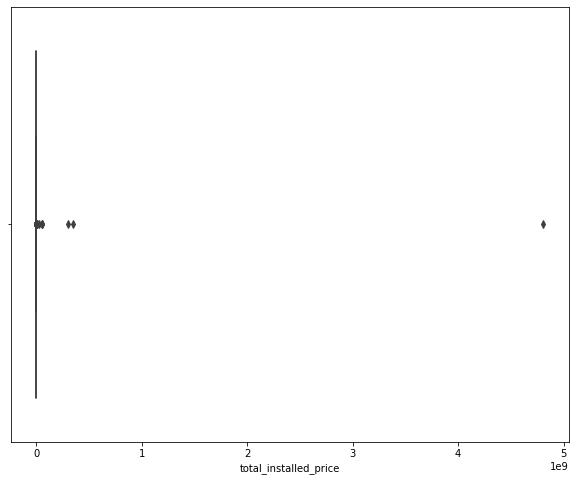

In [74]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(solar['total_installed_price'], ax=ax);

There is another system just under five billion. I can't see any residential system costing more than a few million dollars at an absolute max. I want to see all systems over one-hundred million

In [75]:
solar[solar['total_installed_price'] > 100000000]

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,zip_code,city,state,utility_service_territory,installer_name,year_installed,zipcode
46477,Arizona Public Service,-9999,R131709,-9999,2016-05-20,7.155,4.806585e+09,0.0,RES,85374,Surprise,AZ,Arizona Public Service,Titan Solar Power,2016,85374
65103,Arizona Public Service,-9999,R162849,-9999,2017-04-25,8.400,3.500000e+08,0.0,RES,85937-5224,Snowflake,AZ,Arizona Public Service,Positive Solar Electric,2017,85937
72999,Arizona Public Service,-9999,R175086,-9999,2018-02-12,10.150,2.999700e+08,0.0,RES,85128,Coolidge,AZ,Arizona Public Service,Titan Solar Power,2018,85128


Not only do all of these systems apparently cost hundreds of millions (or billions) of dollars, they are all fairly small. 7-10 kW capacity. They are also all from the same data provider, `Arizona Public Service`. The last extreme price value was as well

In [77]:
solar[solar['data_provider_1'] == 'Arizona Public Service']['total_installed_price'].describe()

count    7.729900e+04
mean     1.031239e+05
std      1.736745e+07
min      1.000000e+00
25%      2.064812e+04
50%      2.860000e+04
75%      3.867543e+04
max      4.806585e+09
Name: total_installed_price, dtype: float64

The systems provided by `Arizona Public Service` have an extremely large standard deviation for cost. 

In [78]:
aps = solar[solar['data_provider_1'] == 'Arizona Public Service']

Text(0.5, 1.0, 'Cost Distribution for Systems Provided by Arizona Public Service')

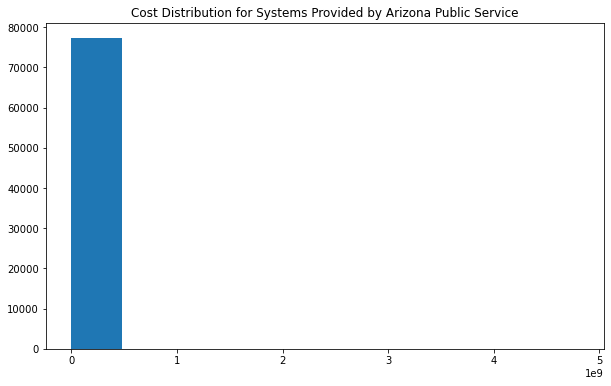

In [83]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(aps['total_installed_price'])
ax.set_title('Cost Distribution for Systems Provided by Arizona Public Service')

In [86]:
# All Arizona Public Service systems greater than one million dollars
aps[aps['total_installed_price'] > 1000000]

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,zip_code,city,state,utility_service_territory,installer_name,year_installed,zipcode
46477,Arizona Public Service,-9999,R131709,-9999,2016-05-20,7.155,4.806585e+09,0.0,RES,85374,Surprise,AZ,Arizona Public Service,Titan Solar Power,2016,85374
47587,Arizona Public Service,-9999,R134071,-9999,2016-06-01,6.500,3.400000e+06,0.0,RES,85050,Phoenix,AZ,Arizona Public Service,Arizona Solar Solutions,2016,85050
47994,Arizona Public Service,-9999,R135024,-9999,2016-06-08,11.772,4.096656e+06,0.0,RES,85344,Parker,AZ,Arizona Public Service,Esmay Electric,2016,85344
48255,Arizona Public Service,-9999,R135613,-9999,2017-01-19,19.950,5.932000e+06,0.0,RES,85262,Scottsdale,AZ,Arizona Public Service,Arizona Solar Solutions,2017,85262
48993,Arizona Public Service,-9999,R137234,-9999,2016-06-24,10.400,3.814200e+06,0.0,RES,85233-5903,Gilbert,AZ,Arizona Public Service,Arizona Solar Solutions,2016,85233
56986,Arizona Public Service,-9999,R150551,-9999,2017-01-05,6.440,2.088240e+06,0.0,RES,85029,Phoenix,AZ,Arizona Public Service,Titan Solar Power,2017,85029
57906,Arizona Public Service,-9999,R151844,-9999,2017-01-05,7.750,2.600125e+06,0.0,RES,85008,Phoenix,AZ,Arizona Public Service,Titan Solar Power,2017,85008
58841,Arizona Public Service,-9999,R153279,-9999,2017-03-25,6.380,2.559060e+06,0.0,RES,85053,Phoenix,AZ,Arizona Public Service,Titan Solar Power,2017,85053
60701,Arizona Public Service,-9999,R156093,-9999,2017-04-03,8.120,2.492840e+06,0.0,RES,85024,Phoenix,AZ,Arizona Public Service,Titan Solar Power,2017,85024
62039,Arizona Public Service,-9999,R158236,-9999,2017-06-24,4.350,1.259325e+06,0.0,RES,85131,Eloy,AZ,Arizona Public Service,Titan Solar Power,2017,85131


All of these systems cost more than 1 million dollars, but are less than 20 kW. I cannot see how that is anything other than a data entry failure

In [87]:
solar[solar['total_installed_price'] > 1000000]

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,zip_code,city,state,utility_service_territory,installer_name,year_installed,zipcode
13713,CA_CPUC,-9999,SCE-INT-NST-61484,-9999,2019-01-10,436.170122,1169176.00,0.0,RES,91767,POMONA,CA,Southern California Edison,Shorebreak Energy Developers,2019,91767
18031,CA_CPUC,-9999,SCE-INT-NST-98678,-9999,2019-10-14,603.387184,1151934.19,0.0,RES,92320,CALIMESA,CA,Southern California Edison,Shorebreak Energy Developers,2019,92320
89238,CA_CPUC,-9999,PGE-INT-116635242,-9999,2019-07-03,619.264800,1022504.47,0.0,RES,95965,OROVILLE,CA,Pacific Gas and Electric,Shorebreak Energy Developers,2019,95965
94572,CA_CPUC,-9999,SCE-INT-NST-73743,-9999,2019-04-05,610.969224,1821807.93,0.0,RES,91304,CANOGA PARK,CA,Southern California Edison,Shorebreak Energy Developers,2019,91304
94882,CA_CPUC,-9999,SCE-INT-NST-58093,-9999,2019-01-11,41.851102,1786018.30,0.0,RES,90810,LONG BEACH,CA,Southern California Edison,Promise Energy,2019,90810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664300,Massachusetts Clean Energy Center,Massachusetts Department of Energy Resources,NFG-SR25630-47138,-9999,2015-09-08,6.500000,4428796.00,0.0,RES,1039,Williamsburg,MA,National Grid,Vivint Solar Developer,2015,1039
666708,Massachusetts Clean Energy Center,Massachusetts Department of Energy Resources,NFG-SR25630-49575,-9999,2015-12-23,446.160000,1273661.00,0.0,RES,1420,Fitchburg,MA,Unitil,Solect Energy Development,2015,1420
675033,Massachusetts Clean Energy Center,Massachusetts Department of Energy Resources,NFG-SR25630-58009,-9999,2016-04-14,647.000000,1440805.00,0.0,RES,2715,Dighton,MA,National Grid,Turning Mill Energy,2016,2715
697211,Massachusetts Clean Energy Center,Massachusetts Department of Energy Resources,NFG-SR25630-80483,-9999,2017-07-13,4475.250000,10009661.50,0.0,RES,2715,Dighton,MA,National Grid,Professional Electricalntractors,2017,2715


There are 140 systems that cost more than one million dollars. Some of these are very large (over 4000 kW), so I can see that being true. The extremely small ones though (less than 20kW) seem unreasonable

In [88]:
# All systems 20kW or less and greater than one million dollars
solar[(solar['system_size_DC'] <= 20) & (solar['total_installed_price'] >= 1000000)]

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,zip_code,city,state,utility_service_territory,installer_name,year_installed,zipcode
169662,CA_CPUC,California Energy Commission,PGE-INT-113589609,NS003SFJ,2017-04-09,5.400,1.435000e+06,9025.00,RES,95987,Williams,CA,Pacific Gas and Electric,-9999,2017,95987
542560,CA_CPUC,California Energy Commission,PGE-INT-114833244,NS005WXH,2018-08-02,3.780,1.458758e+06,971.00,RES,94513,Brentwood,CA,Pacific Gas and Electric,Tesla Energy,2018,94513
46477,Arizona Public Service,-9999,R131709,-9999,2016-05-20,7.155,4.806585e+09,0.00,RES,85374,Surprise,AZ,Arizona Public Service,Titan Solar Power,2016,85374
47587,Arizona Public Service,-9999,R134071,-9999,2016-06-01,6.500,3.400000e+06,0.00,RES,85050,Phoenix,AZ,Arizona Public Service,Arizona Solar Solutions,2016,85050
47994,Arizona Public Service,-9999,R135024,-9999,2016-06-08,11.772,4.096656e+06,0.00,RES,85344,Parker,AZ,Arizona Public Service,Esmay Electric,2016,85344
48255,Arizona Public Service,-9999,R135613,-9999,2017-01-19,19.950,5.932000e+06,0.00,RES,85262,Scottsdale,AZ,Arizona Public Service,Arizona Solar Solutions,2017,85262
48993,Arizona Public Service,-9999,R137234,-9999,2016-06-24,10.400,3.814200e+06,0.00,RES,85233-5903,Gilbert,AZ,Arizona Public Service,Arizona Solar Solutions,2016,85233
56986,Arizona Public Service,-9999,R150551,-9999,2017-01-05,6.440,2.088240e+06,0.00,RES,85029,Phoenix,AZ,Arizona Public Service,Titan Solar Power,2017,85029
57906,Arizona Public Service,-9999,R151844,-9999,2017-01-05,7.750,2.600125e+06,0.00,RES,85008,Phoenix,AZ,Arizona Public Service,Titan Solar Power,2017,85008
58841,Arizona Public Service,-9999,R153279,-9999,2017-03-25,6.380,2.559060e+06,0.00,RES,85053,Phoenix,AZ,Arizona Public Service,Titan Solar Power,2017,85053


In [89]:
# All systems 20kW or less and greater than one million dollars
solar[(solar['system_size_DC'] <= 20) & (solar['total_installed_price'] >= 1000000)]['state'].value_counts(normalize=True)

AZ    0.839286
MA    0.107143
CA    0.035714
PA    0.017857
Name: state, dtype: float64

84% of these systems come from AZ

In [90]:
# All systems 20kW or less and greater than one million dollars
solar[(solar['system_size_DC'] <= 20) & (solar['total_installed_price'] >= 1000000)]['data_provider_1'].value_counts(normalize=True)

Arizona Public Service                                 0.714286
Tucson Electric Power                                  0.089286
MA DOER                                                0.071429
Massachusetts Clean Energy Center                      0.035714
UniSource Energy Services                              0.035714
CA_CPUC                                                0.035714
Pennsylvania Department of Environmental Protection    0.017857
Name: data_provider_1, dtype: float64

71% were submitted by 'Arizona Public Service'. Even if these are accurate, the extreme values will likely be harmful to the overall analysis. Since there are only 140, I am going to drop them

In [91]:
solar = solar.drop(solar[(solar['system_size_DC'] <= 20) & (solar['total_installed_price'] >= 1000000)].index, axis=0)

In [92]:
solar['total_installed_price'].describe()

count    1.206714e+06
mean     2.825537e+04
std      2.639502e+04
min      1.000000e-02
25%      1.761760e+04
50%      2.524100e+04
75%      3.507162e+04
max      1.000966e+07
Name: total_installed_price, dtype: float64

The maximum price is just about 10 million now

In [93]:
solar[solar['total_installed_price'] > 5000000]

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,zip_code,city,state,utility_service_territory,installer_name,year_installed,zipcode
697211,Massachusetts Clean Energy Center,Massachusetts Department of Energy Resources,NFG-SR25630-80483,-9999,2017-07-13,4475.25,10009661.5,0.0,RES,2715,Dighton,MA,National Grid,Professional Electricalntractors,2017,2715


In [94]:
solar['system_size_DC'].max()

16365.0

In [95]:
solar['system_size_DC'].describe()

count    1.570415e+06
mean     6.850365e+00
std      1.690399e+01
min      3.150000e-03
25%      4.283633e+00
50%      6.030000e+00
75%      8.400000e+00
max      1.636500e+04
Name: system_size_DC, dtype: float64

That is by far one of the largest systems in the dataset (75% are below 8.4 kW), so 10 million seems believable.

In [99]:
len(solar[solar['system_size_DC'] > 500])

51

Only 51 systems over 500 kW. I am going to leave these for now, but I may drop extreme outliers later on.

In [101]:
solar[solar['system_size_DC'] > 250]['state'].value_counts(normalize=True)

CA    0.355670
AZ    0.288660
VT    0.190722
MA    0.092784
NM    0.041237
NJ    0.015464
IL    0.015464
Name: state, dtype: float64

These large systems are largely from the same 3 states: California (35.5%), Arizona (28.9%), and Vermont (19%).

In [104]:
solar[solar['system_size_DC'] > 250]['year_installed'].value_counts(normalize=True)

2016    0.139175
2013    0.134021
2019    0.134021
2014    0.128866
2015    0.113402
2017    0.103093
2018    0.103093
2011    0.072165
2012    0.046392
2010    0.025773
Name: year_installed, dtype: float64

They are spread pretty evenly across installation year

In [106]:
installations_per_year = solar.groupby('year_installed').count()['system_size_DC']
capacity_per_year = solar.groupby('year_installed').sum()['system_size_DC']

Text(0.5, 1.0, 'Residential PV Capacity (DC) Installed Per Year')

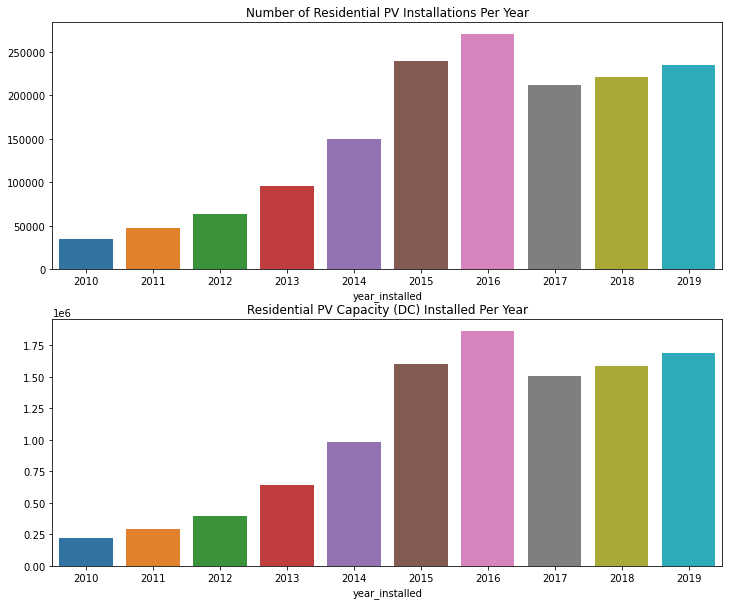

In [108]:
fig, ax = plt.subplots(nrows=2, figsize=(12,10))

sns.barplot(x=installations_per_year.index, y=installations_per_year.values, ax=ax[0])
sns.barplot(x=capacity_per_year.index, y=capacity_per_year.values, ax=ax[1])

ax[0].set_title('Number of Residential PV Installations Per Year')
ax[1].set_title('Residential PV Capacity (DC) Installed Per Year')

There was a rather sharp decline from 2016 to 2017. I am just speculating, but I would assume this may have been due to the Presidential election. 

In [109]:
avg_cost_per_year = solar.groupby('year_installed').mean()['total_installed_price']
avg_cost_per_year

year_installed
2010    40818.672698
2011    37462.900987
2012    32454.863416
2013    30100.097585
2014    29823.638771
2015    28833.551379
2016    27577.534820
2017    26341.774592
2018    26194.168845
2019    26360.553349
Name: total_installed_price, dtype: float64

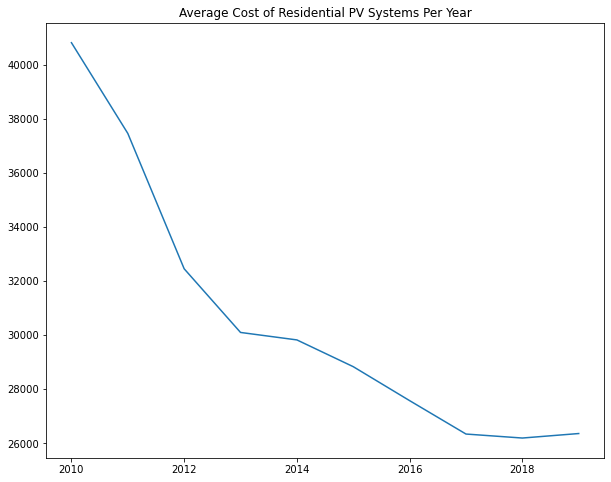

In [112]:
plt.figure(figsize=(10,8))
plt.plot(avg_cost_per_year.index, avg_cost_per_year.values)
plt.title('Average Cost of Residential PV Systems Per Year');

This plot shows a steep decline of average cost over the 10 year period.

In [113]:
avg_system_capacity_per_year = solar.groupby('year_installed').mean()['system_size_DC']
avg_system_capacity_per_year

year_installed
2010    6.154213
2011    6.173505
2012    6.249347
2013    6.654992
2014    6.541970
2015    6.668940
2016    6.893241
2017    7.079314
2018    7.149821
2019    7.176708
Name: system_size_DC, dtype: float64

The average size of PV systems installed actually increased over this time period as well, more than 1 kW from 6.15 on average to 7.17 on average. A good metric for cost is $/watt. One kW is 1,000 watts, so $/watt will be `total_installed_price` / (`system_size_DC` * 1000)

In [114]:
solar['cost_per_watt'] = solar['total_installed_price'] / (solar['system_size_DC'] * 1000)

In [115]:
avg_cost_per_watt_per_year = solar.groupby('year_installed').mean()['cost_per_watt']
avg_cost_per_watt_per_year

year_installed
2010    7.511128
2011    6.551105
2012    5.537771
2013    4.862659
2014    4.618005
2015    4.432355
2016    4.276612
2017    3.940520
2018    3.889738
2019    3.946613
Name: cost_per_watt, dtype: float64

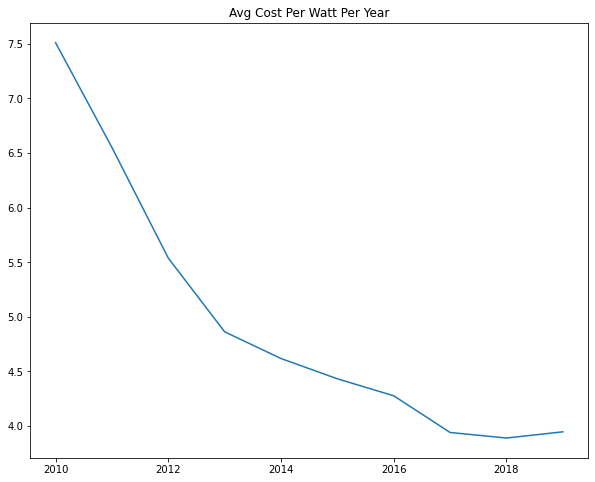

In [117]:
plt.figure(figsize=(10,8))
plt.plot(avg_cost_per_watt_per_year)
plt.title('Avg Cost Per Watt Per Year');

Cost per watt saw the same decline.

Text(0.5, 1.0, 'Avg Cost Per Watt Per Year for Residential PV')

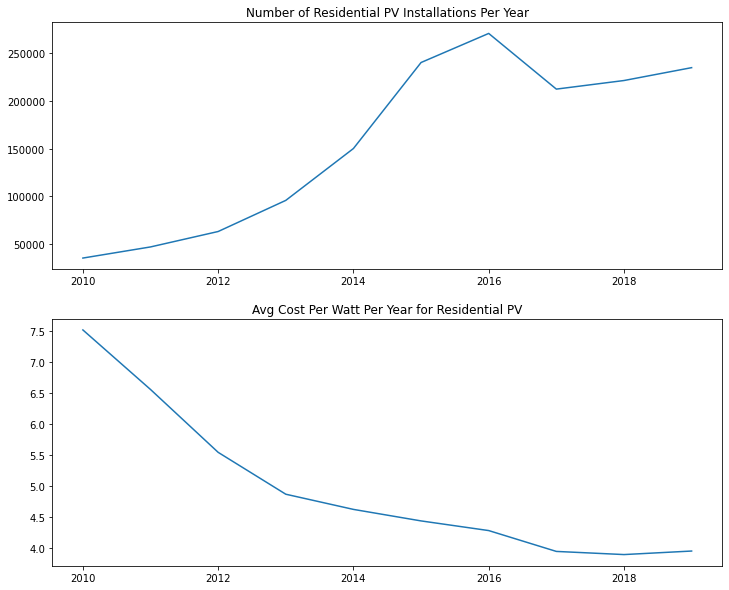

In [118]:
fig, ax = plt.subplots(nrows=2, figsize=(12,10))
ax[0].plot(installations_per_year)
ax[1].plot(avg_cost_per_watt_per_year)

ax[0].set_title('Number of Residential PV Installations Per Year')
ax[1].set_title('Avg Cost Per Watt Per Year for Residential PV')

The plot above shows from 2010 to 2016, number of residential PV installations per year rose as average cost per watt declined. 

In [119]:
solar['month_installed'] = solar['installation_date'].apply(lambda d: d.month)

In [120]:
installations_per_month = solar.groupby('month_installed').count()['system_size_DC']
installations_per_month

month_installed
1     121706
2     113538
3     126617
4     119208
5     128267
6     130157
7     128749
8     137886
9     130992
10    142161
11    137658
12    153476
Name: system_size_DC, dtype: int64

About the same number of installations each month

In [122]:
installations_per_state = solar.groupby('state').count()['system_size_DC'].sort_values(ascending=False)
installations_per_state

state
CA    973416
AZ    151633
NJ    110506
MA     89551
NY     89238
CT     37978
TX     26057
NM     19645
VT     13499
VA      9635
WA      5951
PA      5869
IL      5758
MO      5645
NH      5597
DC      4076
WI      3558
DE      3278
FL      2917
OR      2782
OH      1286
MN      1263
KS      1187
AR        90
Name: system_size_DC, dtype: int64

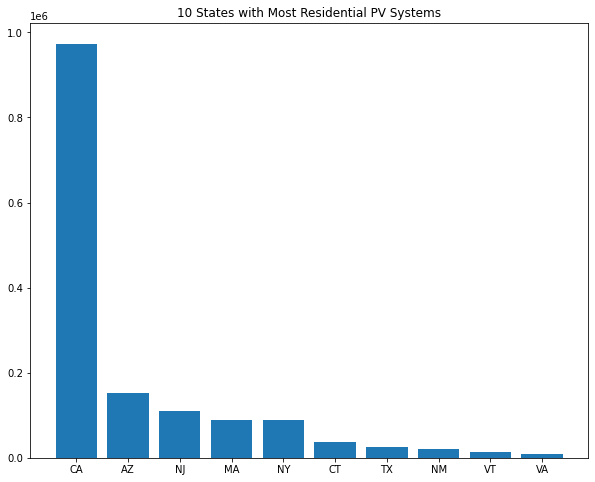

In [124]:
plt.figure(figsize=(10,8))
plt.bar(installations_per_state[:10].index, installations_per_state[:10].values)
plt.title('10 States with Most Residential PV Systems');

California has by far the most number of PV systems, close to one million over the time period.

In [126]:
len(solar[solar['rebate_or_grant'] > 0])

423073

Excluding those missing values (about 80,000), 423,073 PV installations utilized some amount of rebate or grant

In [127]:
avg_incentive_amount_per_year = solar.groupby('year_installed').mean()['rebate_or_grant']
total_incentive_per_year = solar.groupby('year_installed').sum()['rebate_or_grant']

Text(0.5, 1.0, 'Total Rebate or Grant Amount Used Per Year')

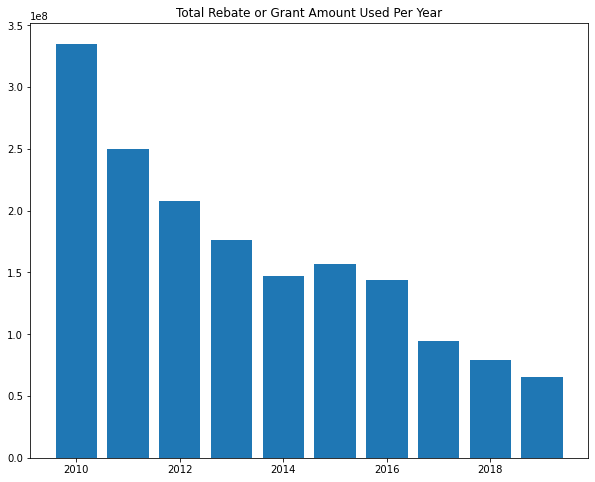

In [128]:
plt.figure(figsize=(10,8))
plt.bar(total_incentive_per_year.index, total_incentive_per_year.values)
plt.title('Total Rebate or Grant Amount Used Per Year')

Text(0.5, 1.0, 'Average Rebate or Grant Per Year')

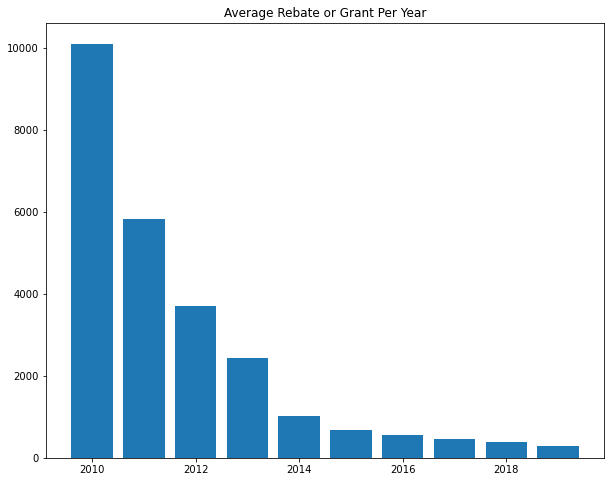

In [129]:
plt.figure(figsize=(10,8))
plt.bar(avg_incentive_amount_per_year.index, avg_incentive_amount_per_year.values)
plt.title('Average Rebate or Grant Per Year')

Financial incentives declined heavily over this time period. This is likely due to the immense decrease in price. 

In [130]:
num_incentives_per_year = solar[solar['rebate_or_grant'] > 0].groupby('year_installed').count()['rebate_or_grant']

Text(0.5, 1.0, 'Number of Incentives Used Per Year')

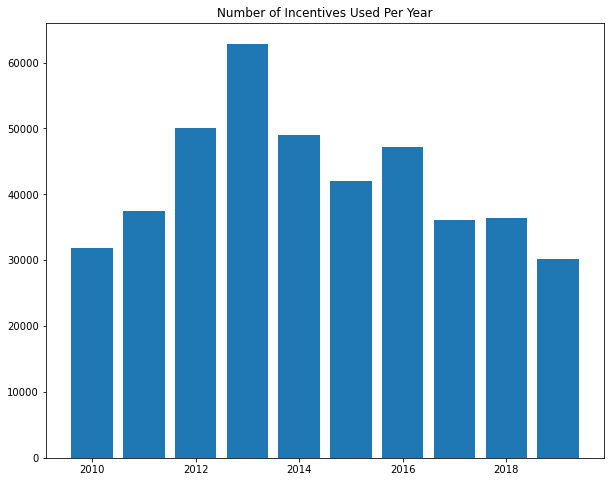

In [131]:
plt.figure(figsize=(10,8))
plt.bar(num_incentives_per_year.index, num_incentives_per_year.values)
plt.title('Number of Incentives Used Per Year')

Although the average incentive amount decreased a lot over the time period, the number of incentives used held rather steady. Peaking in 2013 and declining to same level as 2010 by 2019. I want to see avg percentage of cost covered by incentives

In [132]:
solar['percent_cost_covered'] = (solar['rebate_or_grant'] / solar['total_installed_price']) * 100

In [133]:
avg_cost_covered_per_year = solar.groupby('year_installed').mean()['percent_cost_covered']

Text(0.5, 1.0, 'Average Percent of Cost Covered by Incentives Per Year')

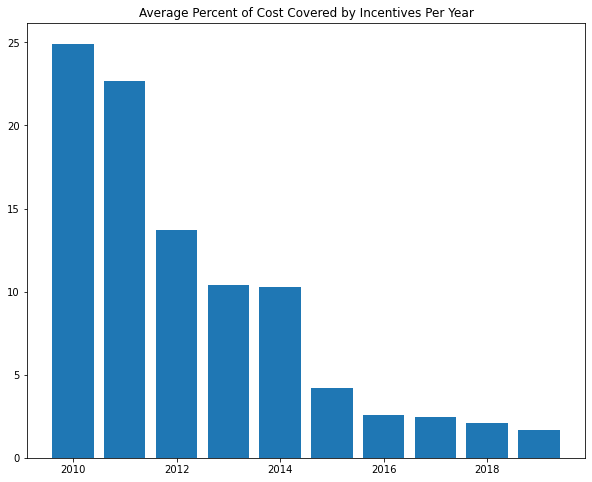

In [134]:
plt.figure(figsize=(10,8))
plt.bar(avg_cost_covered_per_year.index, avg_cost_covered_per_year.values)
plt.title('Average Percent of Cost Covered by Incentives Per Year')

On average, incentives covered about 25% of total cost in 2010, and less than 5% from 2015-2019. I expected average incentive amount to decrease as overall cost decreased, but it seems like overall usage has declined as well.

In [135]:
num_incentives_per_state = solar[solar['rebate_or_grant'] > 0].groupby('state').count()['rebate_or_grant'].sort_values(ascending=False)
num_incentives_per_state

state
CA    224460
NY     87503
AZ     37296
TX     25222
MA     13665
CT      9868
PA      5869
NH      5596
WI      3558
DE      3204
VT      3174
NJ      2951
FL       519
MN       165
OR        23
Name: rebate_or_grant, dtype: int64

In [136]:
avg_cost_covered_per_state = solar.groupby('state').mean()['percent_cost_covered'].sort_values(ascending=False)
avg_cost_covered_per_state

state
TX    26.011288
PA    21.575353
NJ    19.670313
DE    15.646944
NY    13.986567
NH    11.886933
WI    10.993477
FL    10.439997
VT    10.202870
AZ     4.671203
CT     4.473037
CA     3.476439
MN     2.948564
MA     1.481834
OR     1.058776
AR     0.000000
DC          NaN
IL          NaN
KS          NaN
MO          NaN
NM          NaN
OH          NaN
VA          NaN
WA          NaN
Name: percent_cost_covered, dtype: float64

In [139]:
solar.groupby(['state', 'year_installed']).mean()['percent_cost_covered']

state  year_installed
AR     2010               0.000000
       2011               0.000000
AZ     2010              41.786946
       2011              29.308974
       2012              14.689758
                           ...    
WI     2015              13.094369
       2016              12.755224
       2017              10.204974
       2018              10.522007
       2019               9.075891
Name: percent_cost_covered, Length: 212, dtype: float64

In [145]:
solar[solar['state'] == 'AR']['year_installed'].value_counts()

2010    50
2011    40
Name: year_installed, dtype: int64

Arkansas only has 90 total PV systems, all installed in 2010 or 2011. I am going to drop Arkansas

In [146]:
solar = solar[solar['state'] != 'AR']

<AxesSubplot:>

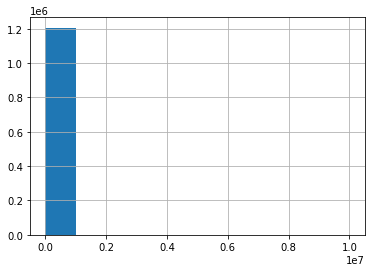

In [151]:
solar['total_installed_price'].hist()

<AxesSubplot:>

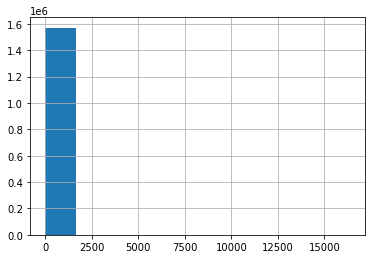

In [152]:
solar['system_size_DC'].hist()

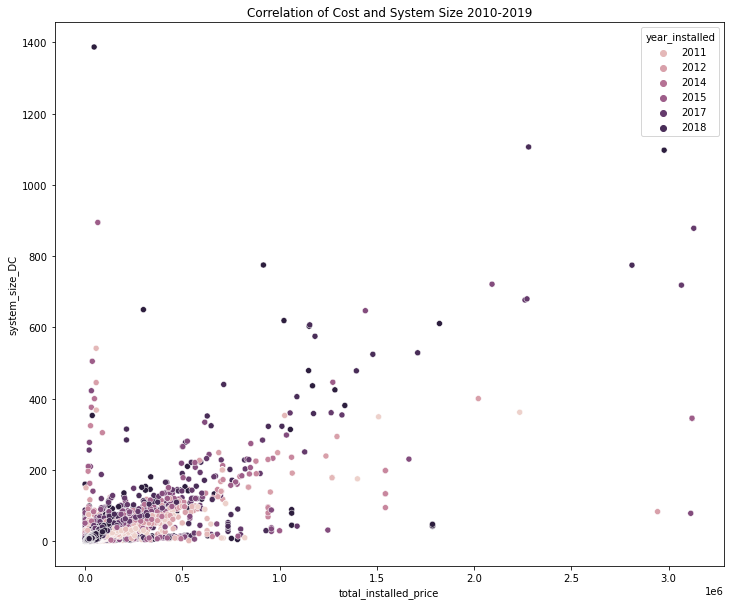

In [161]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(data=solar, x='total_installed_price', y='system_size_DC', hue='year_installed', ax=ax)
ax.set_title('Correlation of Cost and System Size 2010-2019');

I am going to drop this ten million dollar system. I don't think it is extremely useful for my overall analysis.

In [157]:
solar[solar['total_installed_price'] > 5000000]

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,zip_code,city,state,utility_service_territory,installer_name,year_installed,zipcode,cost_per_watt,month_installed,percent_cost_covered
697211,Massachusetts Clean Energy Center,Massachusetts Department of Energy Resources,NFG-SR25630-80483,-9999,2017-07-13,4475.25,10009661.5,0.0,RES,2715,Dighton,MA,National Grid,Professional Electricalntractors,2017,2715,2.236671,7,0.0


In [158]:
solar = solar.drop(697211, axis=0)

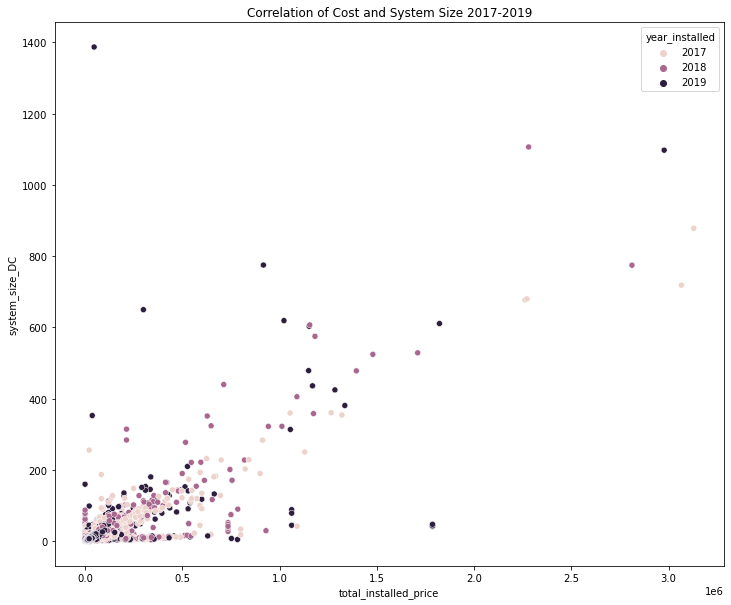

In [162]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(data=solar[solar['year_installed'] >= 2017], x='total_installed_price', y='system_size_DC', hue='year_installed', ax=ax)
ax.set_title('Correlation of Cost and System Size 2017-2019');

For the most part, larger systems cost more money.

## Explore Next Steps

When I combine this data with the environmental, socioeconomic, and key factors data, it will be at the zip code level (ZCTA). Meaning I will need to take an aggregate of each important column from this dataframe for each zip code (total capacity per zip code, total number of systems per zip code, avg cost per zip code, etc). I want to experiment with that. One potential problem that stands out is the missing values for `total_installed_price` and `rebate_or_grant`. I am either going to need to ignore those missing values, impute them somehow, or just not use those columns. For now, I will focus on `system_size_DC`.

I want the total number of residential PV systems, total capacity, and average capacity for each zip code

In [163]:
total_systems_per_zip = solar.groupby('zipcode').count()['system_size_DC'].to_dict()
total_systems_per_zip

{'01001': 23,
 '01002': 60,
 '01005': 5,
 '01007': 10,
 '01008': 2,
 '01010': 4,
 '01011': 2,
 '01012': 10,
 '01026': 1,
 '01027': 42,
 '01028': 7,
 '01030': 11,
 '01032': 2,
 '01033': 8,
 '01034': 8,
 '01035': 13,
 '01036': 1,
 '01037': 4,
 '01038': 33,
 '01039': 1,
 '01040': 1,
 '01050': 5,
 '01054': 10,
 '01056': 25,
 '01057': 11,
 '01060': 22,
 '01062': 19,
 '01068': 1,
 '01069': 3,
 '01070': 6,
 '01071': 2,
 '01072': 11,
 '01073': 14,
 '01075': 4,
 '01077': 12,
 '01082': 6,
 '01083': 2,
 '01084': 1,
 '01085': 2,
 '01088': 1,
 '01089': 28,
 '01093': 7,
 '01095': 8,
 '01096': 3,
 '01098': 4,
 '01104': 17,
 '01105': 3,
 '01106': 22,
 '01107': 2,
 '01108': 7,
 '01109': 13,
 '01118': 22,
 '01119': 14,
 '01128': 8,
 '01129': 20,
 '01151': 9,
 '01201': 35,
 '01223': 10,
 '01225': 2,
 '01226': 12,
 '01230': 14,
 '01235': 9,
 '01237': 12,
 '01238': 8,
 '01240': 2,
 '01243': 5,
 '01245': 1,
 '01247': 6,
 '01253': 3,
 '01254': 6,
 '01255': 3,
 '01256': 1,
 '01257': 6,
 '01259': 2,
 '01262': 

In [164]:
total_capacity_per_zip = solar.groupby('zipcode').sum()['system_size_DC'].to_dict()
total_capacity_per_zip

{'01001': 219.787,
 '01002': 402.67000000000013,
 '01005': 26.894999999999996,
 '01007': 60.38099999999999,
 '01008': 13.15,
 '01010': 22.96,
 '01011': 9.45,
 '01012': 62.809999999999995,
 '01026': 10.0,
 '01027': 309.667,
 '01028': 42.480000000000004,
 '01030': 103.595,
 '01032': 9.84,
 '01033': 72.735,
 '01034': 53.42400000000001,
 '01035': 544.0360000000002,
 '01036': 5.16,
 '01037': 30.25,
 '01038': 206.32,
 '01039': 6.6,
 '01040': 9.12,
 '01050': 38.84,
 '01054': 73.984,
 '01056': 214.15999999999994,
 '01057': 65.6,
 '01060': 98.697,
 '01062': 94.71000000000001,
 '01068': 1.275,
 '01069': 19.759999999999998,
 '01070': 39.402,
 '01071': 9.48,
 '01072': 64.17,
 '01073': 105.49900000000001,
 '01075': 27.07,
 '01077': 120.8,
 '01082': 90.80499999999999,
 '01083': 10.17,
 '01084': 4.96,
 '01085': 14.120000000000001,
 '01088': 7.2,
 '01089': 354.03999999999996,
 '01093': 53.46,
 '01095': 54.169999999999995,
 '01096': 14.02,
 '01098': 20.995,
 '01104': 107.538,
 '01105': 13.86,
 '01106':

In [165]:
avg_system_capacity_per_zip = solar.groupby('zipcode').mean()['system_size_DC'].to_dict()
avg_system_capacity_per_zip

{'01001': 9.55595652173913,
 '01002': 6.711166666666669,
 '01005': 5.379,
 '01007': 6.038099999999999,
 '01008': 6.575,
 '01010': 5.74,
 '01011': 4.725,
 '01012': 6.281,
 '01026': 10.0,
 '01027': 7.373023809523809,
 '01028': 6.068571428571429,
 '01030': 9.417727272727273,
 '01032': 4.92,
 '01033': 9.091875,
 '01034': 6.678000000000001,
 '01035': 41.84892307692309,
 '01036': 5.16,
 '01037': 7.5625,
 '01038': 6.252121212121212,
 '01039': 6.6,
 '01040': 9.12,
 '01050': 7.768000000000001,
 '01054': 7.3984,
 '01056': 8.566399999999998,
 '01057': 5.963636363636363,
 '01060': 4.486227272727273,
 '01062': 4.984736842105264,
 '01068': 1.275,
 '01069': 6.586666666666666,
 '01070': 6.567,
 '01071': 4.74,
 '01072': 5.833636363636364,
 '01073': 7.535642857142858,
 '01075': 6.7675,
 '01077': 10.066666666666666,
 '01082': 15.134166666666665,
 '01083': 5.085,
 '01084': 4.96,
 '01085': 7.0600000000000005,
 '01088': 7.2,
 '01089': 12.644285714285713,
 '01093': 7.637142857142857,
 '01095': 6.771249999999

My final dataset will consist of each ZCTA as a row, and all of the associated data for each ZCTA as columns. Some variation of the info above will be my target variable.

I performed quite a bit of cleaning on this data, I want to save this as a new csv so I can pick up where I left off in my next notebook.

In [166]:
solar.to_csv('../../data/pv-systems.csv')